<a href="https://colab.research.google.com/github/BorysZhyhalo/All-Python-codes-of-ZTM-course-by-Andrei-Neagoie/blob/master/Lesson7_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Завантажуємо датасет:

In [ ]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [ ]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
df = pd.DataFrame(dataset['data'], columns = dataset['feature_names'])

In [ ]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


Опис набору даних:

In [ ]:
target_col_name = dataset['target_names'][0]

In [ ]:
dataset['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [ ]:
df[target_col_name] = dataset['target']

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

Опис даних також можна знайти [тут](https://www.kaggle.com/camnugent/california-housing-prices).

Видалимо змінну, щоб вона не займала місце.

In [ ]:
del dataset

Виберемо одну змінну, яка має лінійну залежність із цільовою змінною.

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


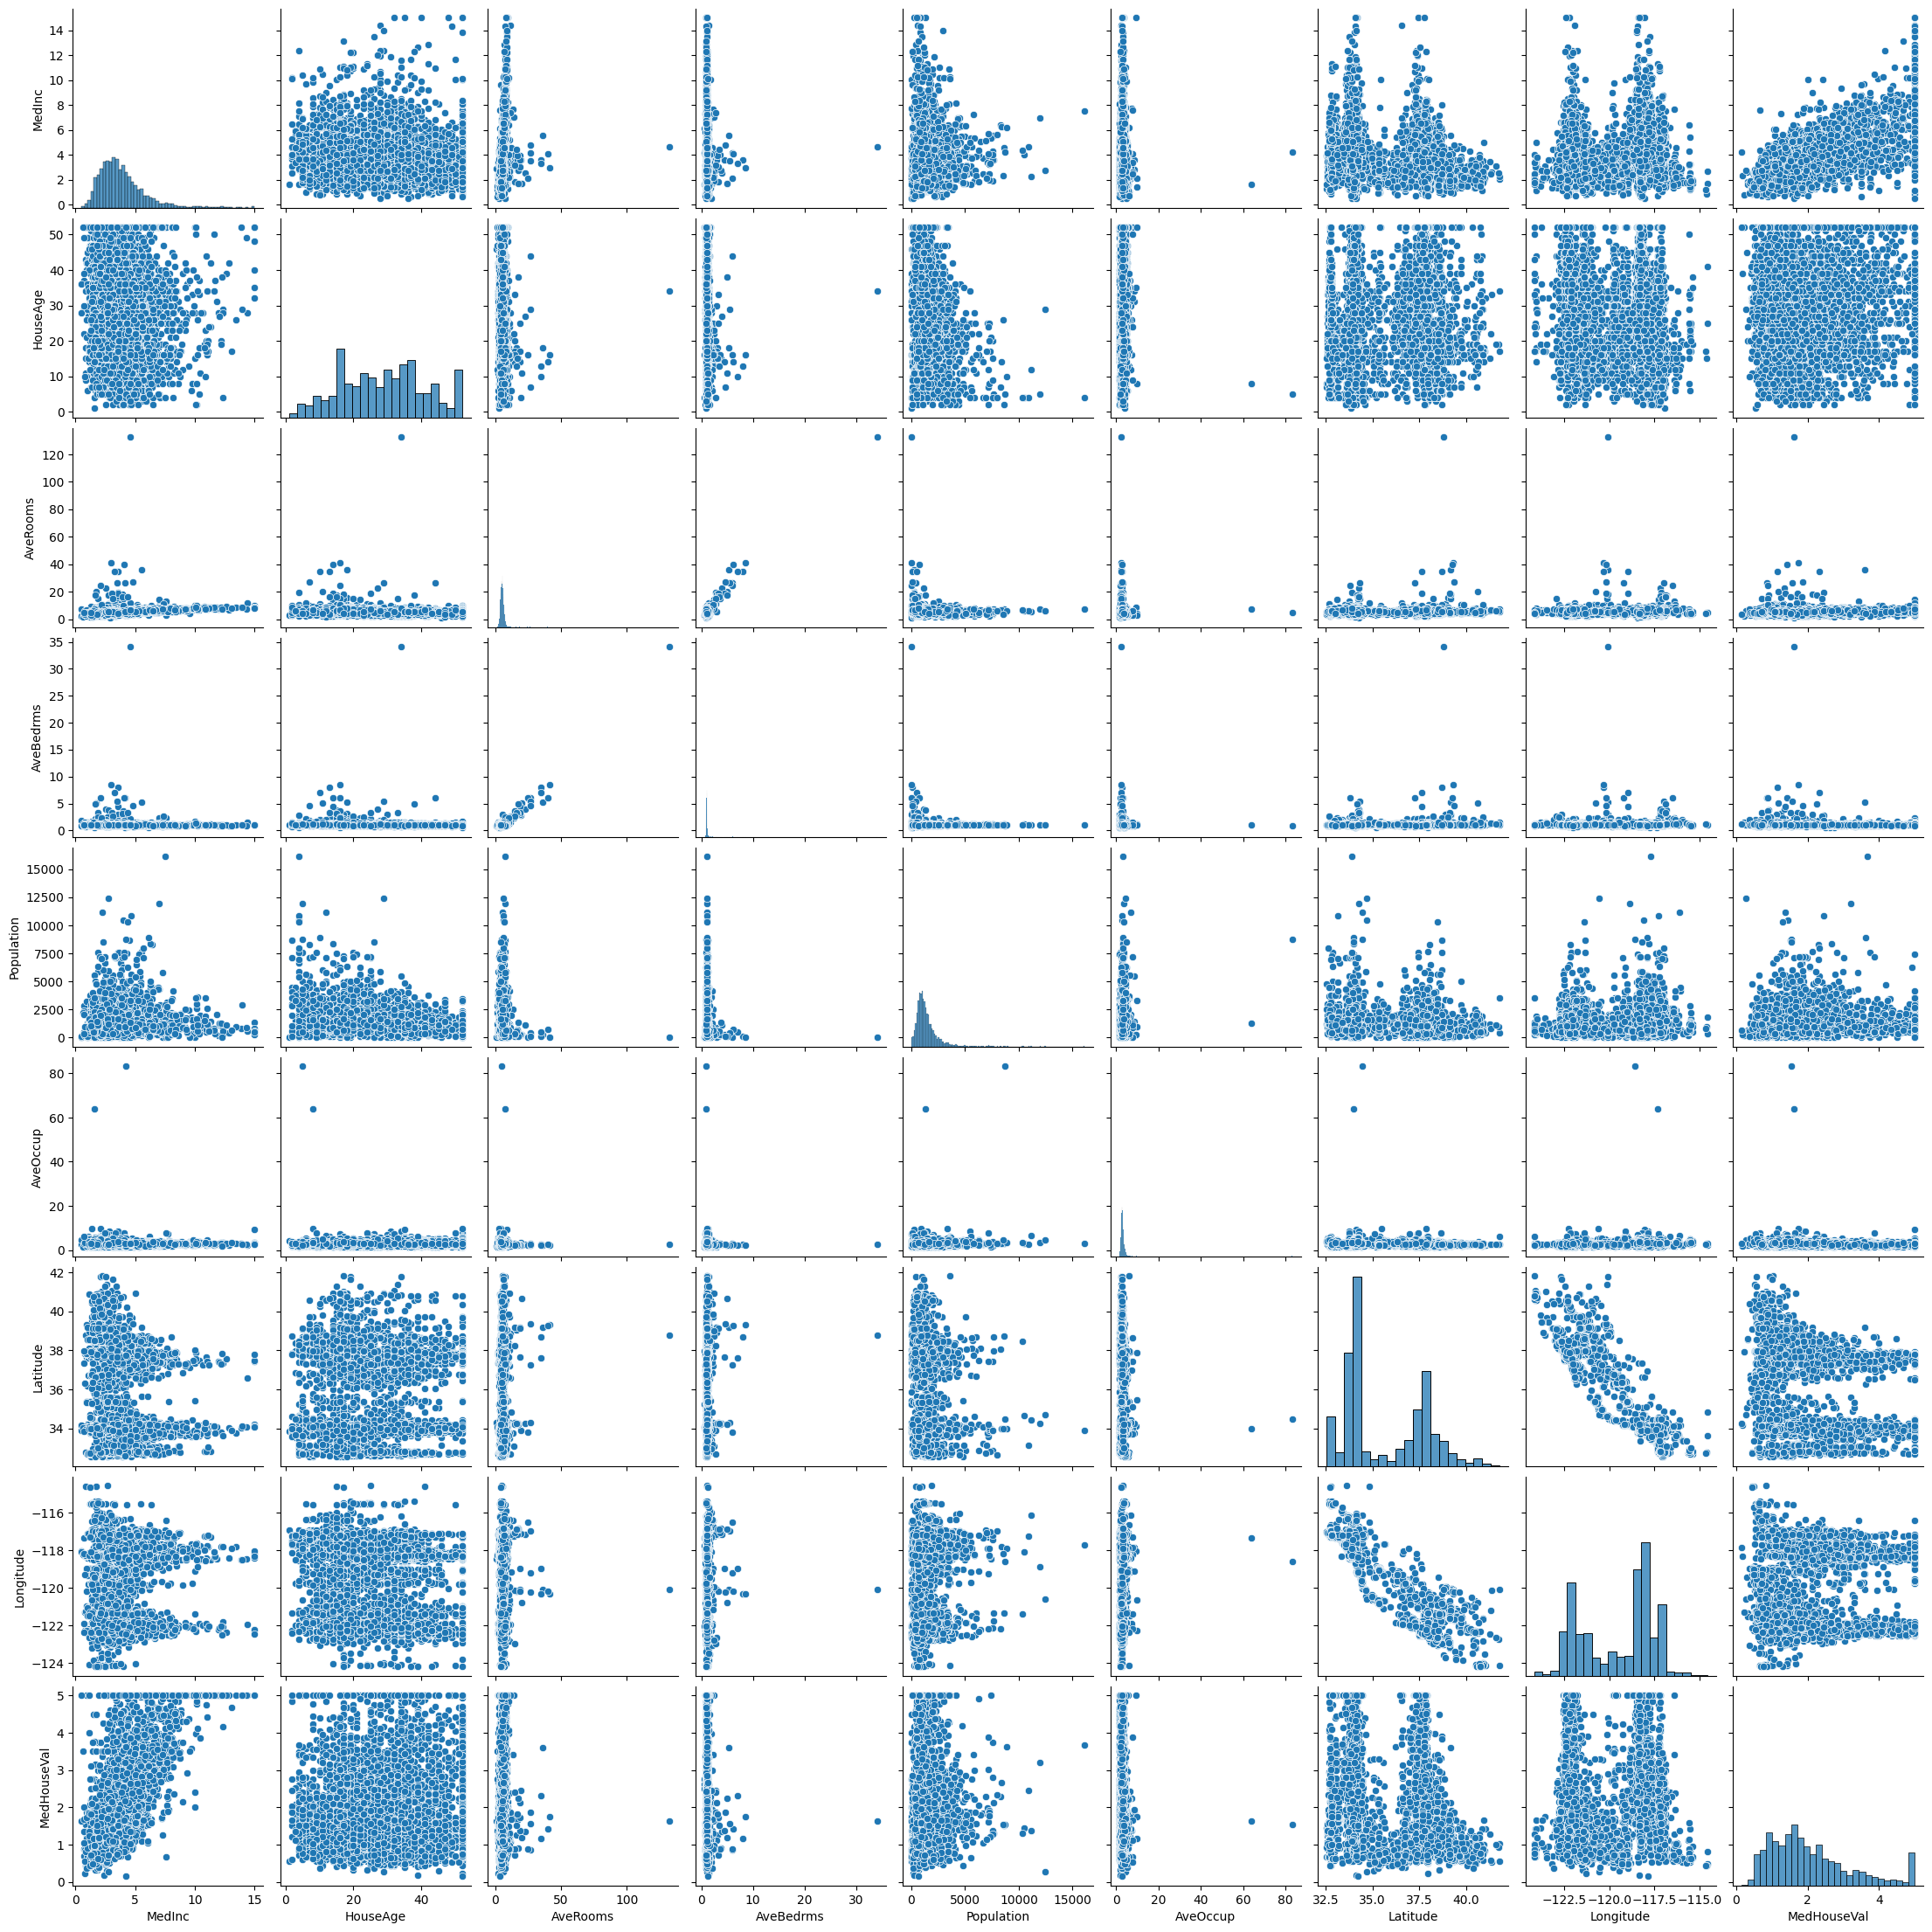

In [ ]:
sns.pairplot(df.sample(frac=0.2, random_state=42))

Видно, що MedInc та MedHouseVal мають схожу лінійну залежність. Можна ще глянути на величину кореляцій.

In [ ]:
df.corr()['MedHouseVal']

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

# Збудуємо просту лінійну регресію

**Scikit-learn** (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

Імпортуємо метод з sklearn. Документацію [тут](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
from sklearn.linear_model import LinearRegression

Визначимо набір ознак та вибір цільової змінної.

In [ ]:
X = pd.DataFrame(df['MedInc'])
y = df['MedHouseVal']

In [ ]:
X

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
lr = LinearRegression()

Так не працюватиме:

In [ ]:
lr.fit(X['MedInc'], y)

ValueError: Expected 2D array, got 1D array instead:
array=[8.3252 8.3014 7.2574 ... 1.7    1.8672 2.3886].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

А ось так буде:

In [ ]:
lr.fit(X, y)

LinearRegression()

Що є всередині lr

In [ ]:
vars(lr)

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['MedInc'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.41793849]),
 'rank_': 1,
 'singular_': array([272.93370681]),
 'intercept_': 0.45085576703267893}

*Intercept* – the location where the Slope intercepts the Y-axis denoted b in the slope equation y=ax+b.

In [ ]:
lr.coef_, lr.intercept_

(array([0.41793849]), 0.45085576703267893)

[Linear model interpretation](https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html)

Знайдемо передбачення:

In [ ]:
y_pred = lr.predict(X)

Досліджуємо помилки моделі:

In [ ]:
y_df = y.rename('gt').to_frame()

In [ ]:
y_df

,gt
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [ ]:
y_df['pred'] = y_pred

In [ ]:
y_df.head()

,gt,pred
0,4.526,3.930277
1,3.585,3.920330
2,3.521,3.484003
3,3.413,2.809324
4,3.422,2.058331


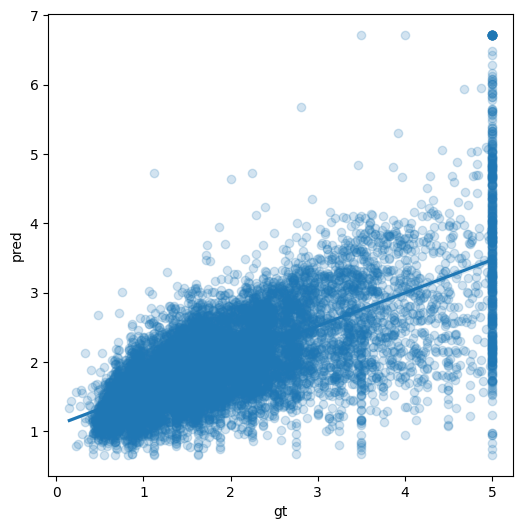

In [ ]:
plt.figure(figsize=(6,6))
sns.regplot(data=y_df.sample(frac=0.5), x='gt', y='pred', scatter_kws={'alpha':0.2});

Корисно розглянути графіки щільності передбачень та проаналізувати, які значення модель передбачає найгірше.

<ipython-input-36-a425ca272575>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_df['gt'], shade=True, color="g", label='gt')
<ipython-input-36-a425ca272575>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_df['pred'], shade=True, color="b", label='pred')


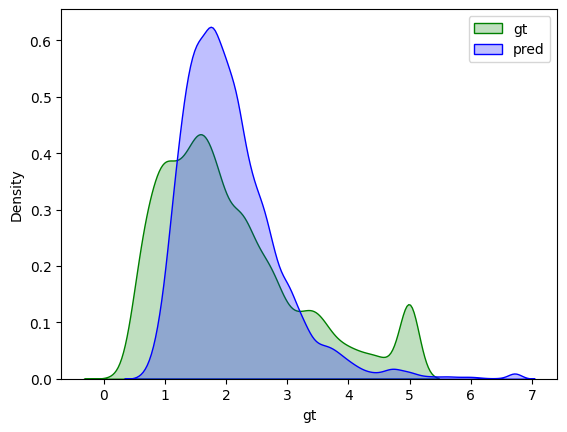

In [ ]:
sns.kdeplot(y_df['gt'], shade=True, color="g", label='gt')
sns.kdeplot(y_df['pred'], shade=True, color="b", label='pred')
plt.legend()
plt.show()

Розрахуємо метрики моделі:

In [ ]:
from sklearn.metrics import mean_squared_error

Mean Squared Error

In [ ]:
mean_squared_error(y_df['gt'], y_df['pred'])

0.7011311502929527

Root Mean Squared Error

In [ ]:
mean_squared_error(y_df['gt'], y_df['pred'], squared=False)

0.8373357452616917

Для інтерпретації значень знайдемо показники розподілу цільової змінної:

In [ ]:
y_df['gt'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: gt, dtype: float64

Отже, наша модель помиляється в середньому на 0.84. Так як значення цільової змінної варіюється (розмах вибірки) від 0.14 до 5.0 з середнім рівним 2, результат не такий вже й поганий. **Але** ми отримали такий результат на даних, на яких модель тренувалась. Чи буде модель працювати так само добре на нових даних? Не факт. Це вартує перевірити.

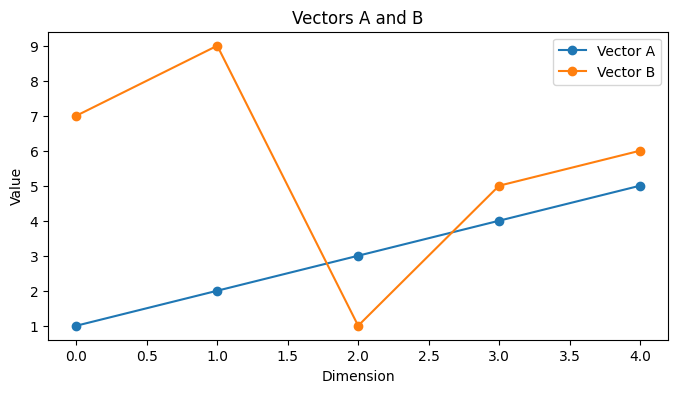

Cosine Similarity: 0.759036470557485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Приклад векторів (документів чи об'єктів)
vector_a = np.array([1, 2, 3, 4, 5])
vector_b = np.array([7, 9, 1, 5, 6])

# Розрахунок косинусної подібності
cosine_sim = cosine_similarity([vector_a], [vector_b])[0, 0]

# Візуалізація векторів
plt.figure(figsize=(8, 4))
plt.plot(range(len(vector_a)), vector_a, label='Vector A', marker='o')
plt.plot(range(len(vector_b)), vector_b, label='Vector B', marker='o')
plt.title('Vectors A and B')
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.legend()
plt.show()

# Виведення значення косинусної подібності
print(f'Cosine Similarity: {cosine_sim}')